# In this notebook, we will be training a SVM for language classification on the WiLI dataset.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

## Loading data and vectorization

In [2]:
# Load data


with open('WiLI/x_train.txt', 'r', encoding='utf-8') as f:
    x_train = f.read().splitlines()

with open('WiLI/y_train.txt', 'r', encoding='utf-8') as f:
    y_train = f.read().splitlines()

with open('WiLI/x_test.txt', 'r', encoding='utf-8') as f:
    x_test = f.read().splitlines()

with open('WiLI/y_test.txt', 'r', encoding='utf-8') as f:
    y_test = f.read().splitlines()



In [3]:
# Encode labels

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [4]:
# TF-IDF Vectorization 

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 3),
    analyzer='char_wb'
)

X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)


## Training the SVM

In [5]:

svm_clf = LinearSVC()

print("Training SVM...")
start = time.time()
svm_clf.fit(X_train, y_train_encoded)
end = time.time()
print(f"Training time: {(end - start):.2f} seconds")


Training SVM...
Training time: 1945.38 seconds


## Evaluation on the test set

In [6]:

y_pred = svm_clf.predict(X_test)


report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("SVM Classification Report:\n")
print(report)


with open("SVM_classification_report.txt", "w", encoding="utf-8") as f:
    f.write("SVM Classification Report\n")
    f.write("="*60 + "\n")
    f.write(report)


accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


SVM Classification Report:

              precision    recall  f1-score   support

         ace       1.00      0.99      0.99       500
         afr       0.99      0.99      0.99       500
         als       0.93      0.94      0.93       500
         amh       1.00      0.99      1.00       500
         ang       0.96      0.94      0.95       500
         ara       0.89      0.99      0.94       500
         arg       0.98      0.99      0.99       500
         arz       0.99      0.91      0.95       500
         asm       1.00      0.97      0.98       500
         ast       0.96      0.97      0.96       500
         ava       0.83      0.85      0.84       500
         aym       0.98      0.94      0.96       500
         azb       0.99      1.00      0.99       500
         aze       0.99      0.98      0.99       500
         bak       1.00      0.98      0.99       500
         bar       0.89      0.92      0.90       500
         bcl       0.99      0.97      0.98       500

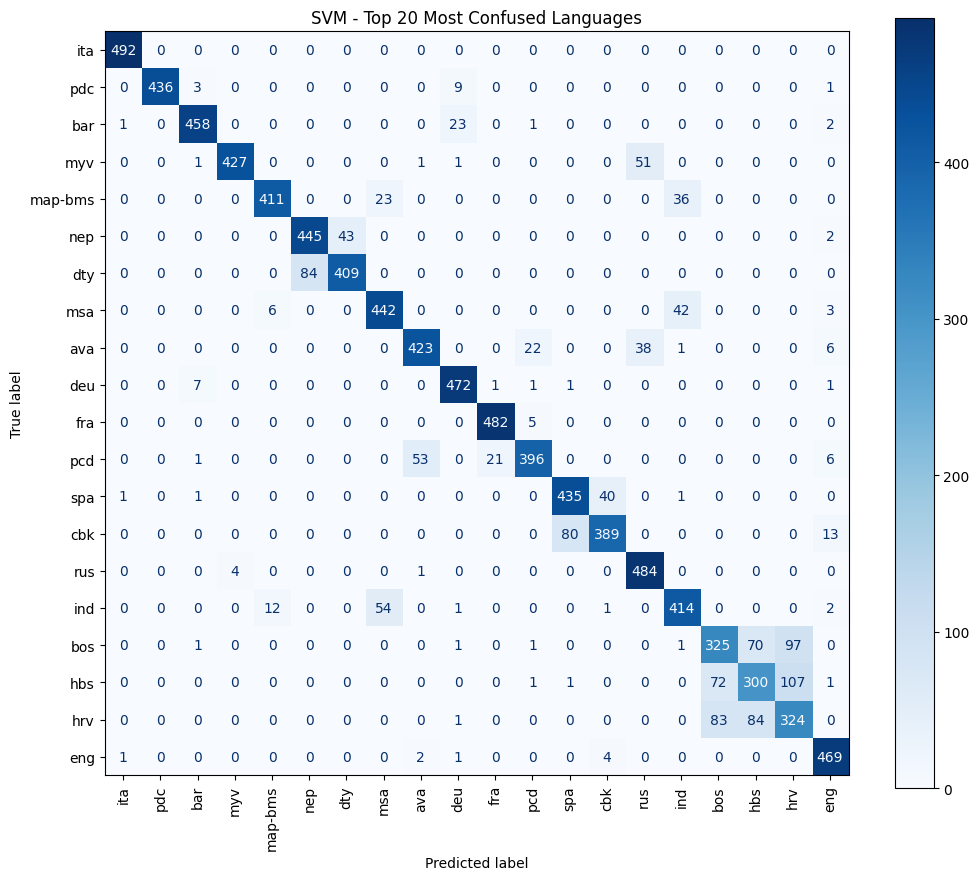

In [7]:
# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)


# Zero the diagonal to find most confused classes
errors = cm.copy()
np.fill_diagonal(errors, 0)
confusion_sums = errors.sum(axis=1) + errors.sum(axis=0)

# Get top 20 confused label indices
N = 20
top_n_indices = np.argsort(confusion_sums)[-N:]

# Slice matrix and map to labels
small_cm = cm[np.ix_(top_n_indices, top_n_indices)]
small_labels = [label_encoder.classes_[i] for i in top_n_indices]

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=small_cm, display_labels=small_labels)
disp.plot(ax=ax, xticks_rotation='vertical', values_format='.0f', cmap='Blues')
plt.title(f"SVM - Top {N} Most Confused Languages")
plt.show()

fig.savefig("SVM_confusion_matrix_top20.png", dpi=300, bbox_inches='tight')